In [1]:

!python -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\dev\anaconda3\lib\site-packages (10.0.1)


In [2]:

# Install a pip package in the current Jupyter kernel
import sys

!{sys.executable} -m pip install ipykernel --upgrade

Requirement already up-to-date: ipykernel in c:\users\dev\anaconda3\lib\site-packages (4.8.2)
Requirement not upgraded as not directly required: traitlets>=4.1.0 in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (4.3.2)
Requirement not upgraded as not directly required: tornado>=4.0 in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (4.5.3)
Requirement not upgraded as not directly required: jupyter-client in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (5.2.2)
Requirement not upgraded as not directly required: ipython>=4.0.0 in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (6.2.1)
Requirement not upgraded as not directly required: ipython_genutils in c:\users\dev\anaconda3\lib\site-packages (from traitlets>=4.1.0->ipykernel) (0.2.0)
Requirement not upgraded as not directly required: six in c:\users\dev\anaconda3\lib\site-packages (from traitlets>=4.1.0->ipykernel) (1.11.0)
Requirement not upgraded as not directly required: decorator in c:\u

In [3]:

# Install a pip package in the current Jupyter kernel
import sys

!{sys.executable} -m pip install networkx --upgrade

Requirement already up-to-date: networkx in c:\users\dev\anaconda3\lib\site-packages (2.1)
Requirement not upgraded as not directly required: decorator>=4.1.0 in c:\users\dev\anaconda3\lib\site-packages (from networkx) (4.2.1)


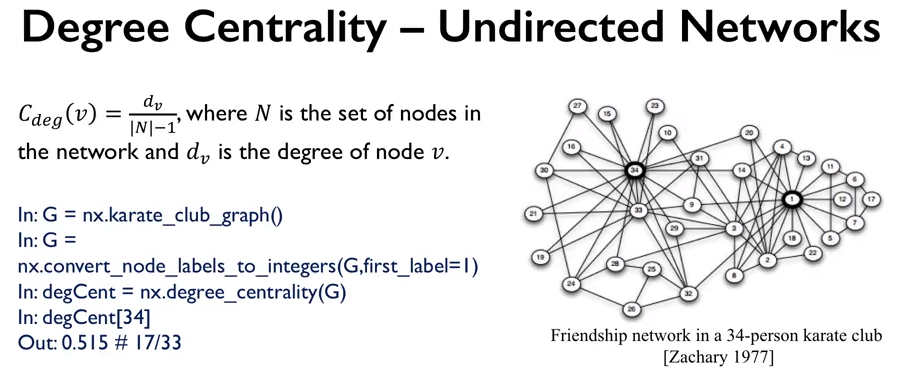

In [4]:

from IPython.display import Image

Image('../../saves/png/degree_centrality_undirected_networks.png')

In [5]:

import networkx as nx

karate_club_graph = nx.karate_club_graph()
karate_club_graph = nx.convert_node_labels_to_integers(karate_club_graph, first_label=1)

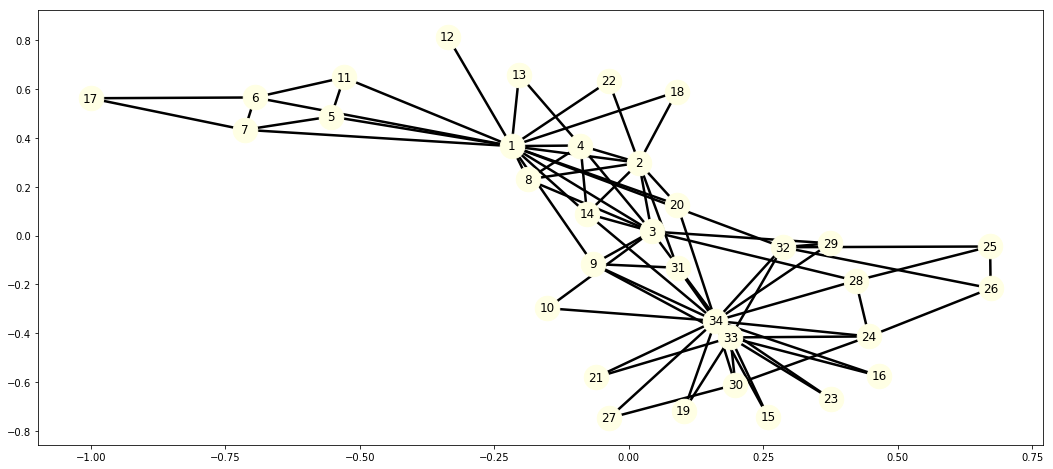

In [6]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(karate_club_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [7]:

degree_centrality = nx.degree_centrality(karate_club_graph)
print(degree_centrality[34])
print(degree_centrality[33])

0.5151515151515151
0.36363636363636365


In [8]:

disconnected_dipraph = nx.DiGraph()
disconnected_dipraph.add_nodes_from([chr(i) for i in range(65, 80)])
disconnected_dipraph.add_edges_from([('A', 'B'), ('A', 'E'), ('A', 'N'), ('B', 'C'), ('B', 'E'),
                                     ('C', 'A'), ('C', 'D'), ('D', 'B'), ('D', 'E'),
                                     ('E', 'C'), ('E', 'D'), ('F', 'G'), ('G', 'A'), ('G', 'J'),
                                     ('H', 'G'), ('H', 'I'), ('I', 'F'), ('I', 'G'), ('I', 'H'), ('I', 'J'),
                                     ('J', 'F'), ('J', 'O'), ('K', 'L'), ('K', 'M'), ('L', 'M'),
                                     ('N', 'L'), ('N', 'O'), ('O', 'J'), ('O', 'K'), ('O', 'L')])

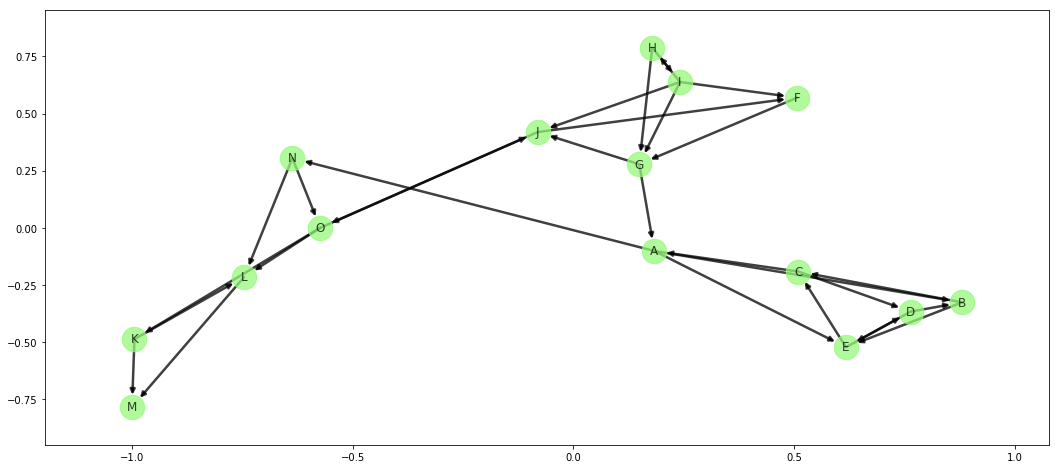

In [9]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(disconnected_dipraph, node_color='xkcd:light green',
                 alpha=.75, width=2.5, node_size=600)

In [10]:

# The degree centrality for a node v is the fraction of nodes it
# is connected to
degree_centrality = nx.degree_centrality(disconnected_dipraph)

# The in-degree centrality for a node v is the fraction of nodes its
# incoming edges are connected to
in_degree_centrality = nx.in_degree_centrality(disconnected_dipraph)
print(in_degree_centrality['A'])
print(in_degree_centrality['L'])

# The out-degree centrality for a node v is the fraction of nodes its
# outgoing edges are connected to
out_degree_centrality = nx.out_degree_centrality(disconnected_dipraph)
print(out_degree_centrality['A'])
print(out_degree_centrality['L'])

0.14285714285714285
0.21428571428571427
0.21428571428571427
0.07142857142857142


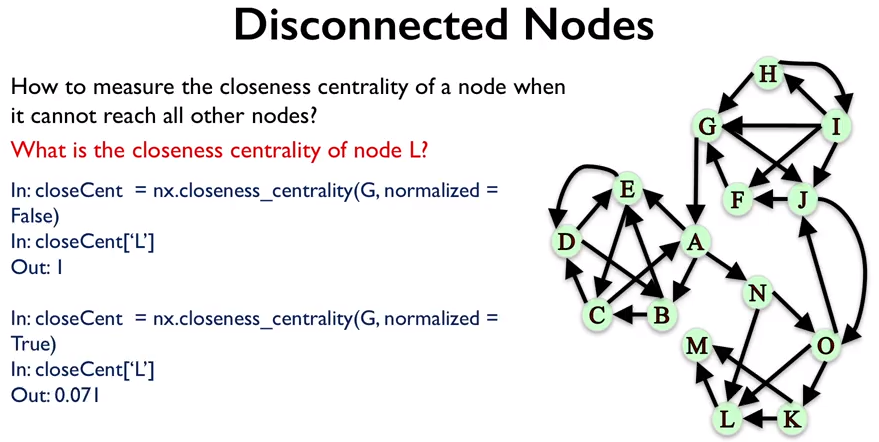

In [11]:

from IPython.display import Image

Image('../../saves/png/disconnect_nodes.png')

In [12]:

# Closeness centrality of node L is the reciprocal of the
# average shortest path distance to L over all n-1 reachable nodes
print('{:.3} = ({}-1)/{} = {:.3}'.format(nx.closeness_centrality(karate_club_graph, u=32, wf_improved=False),
                                 len(karate_club_graph.nodes()),
                                 sum(nx.shortest_path_length(karate_club_graph, source=32).values()),
                                 (len(karate_club_graph.nodes())-1)/sum(nx.shortest_path_length(karate_club_graph,
                                                                                                source=32).values())))

0.541 = (34-1)/61 = 0.541


In [13]:

# Closeness centrality of node L is the reciprocal of the
# average shortest path distance to L over all n-1 reachable nodes
nx.closeness_centrality(disconnected_dipraph, u='L', wf_improved=False, reverse=True)

1.0

In [14]:

# Wasserman and Faust propose an improved formula for graphs with
# more than one connected component. The result is "a ratio of the
# fraction of actors in the group who are reachable, to the average
# distance" from the reachable actor
nx.closeness_centrality(disconnected_dipraph, u='L', wf_improved=True, reverse=True)

0.07142857142857142


Which node has the highest closeness centrality under option 1, where we only consider the distance to reachable nodes? _Note: the closeness centrality of nodes that cannot reach any other nodes is always zero._

In [15]:

import numpy as np

disconnected_dipraph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 69)]
disconnected_dipraph.add_nodes_from(node_list)
disconnected_dipraph.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D')])

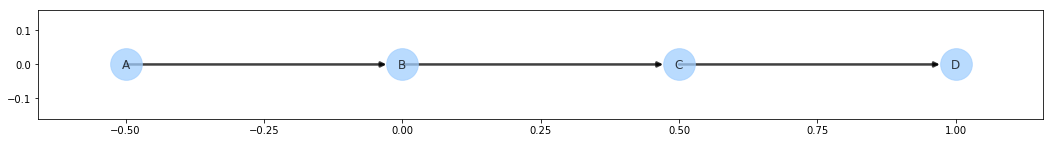

In [16]:

# Draw the graph using the custom layout
plt.figure(figsize=(18, 2))
pos = {'A': np.array([-0.5, 0]),
       'B': np.array([0, 0]),
       'C': np.array([0.5, 0]),
       'D': np.array([1, 0])}
nx.draw_networkx(disconnected_dipraph, pos, node_color='xkcd:baby blue',
                 alpha=.75, width=2.5, node_size=1000)

In [17]:

for node in node_list:
    print(node, nx.closeness_centrality(disconnected_dipraph, u=node, wf_improved=False, reverse=True))

A 0.5
B 0.6666666666666666
C 1.0
D 0.0



Which node has the highest closeness centrality under option 2, where we normalize by the fraction of nodes a node can reach? _Note: the closeness centrality of nodes that cannot reach any other nodes is always zero._

In [18]:

for node in node_list:
    print(node, nx.closeness_centrality(disconnected_dipraph, u=node, wf_improved=True, reverse=True))

A 0.5
B 0.4444444444444444
C 0.3333333333333333
D 0.0



Given the following network, which node has the highest betweenness (excluding endpoints)? What’s the betweenness score (excluding endpoints) of this node? _Give your answer in the following format: X, #_

In [19]:

betweenness_graph = nx.Graph()
node_list = [chr(i) for i in range(65, 72)]
betweenness_graph.add_nodes_from(node_list)
betweenness_graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'),
                                  ('D', 'E'), ('E', 'F'), ('E', 'G'), ('F', 'G')])

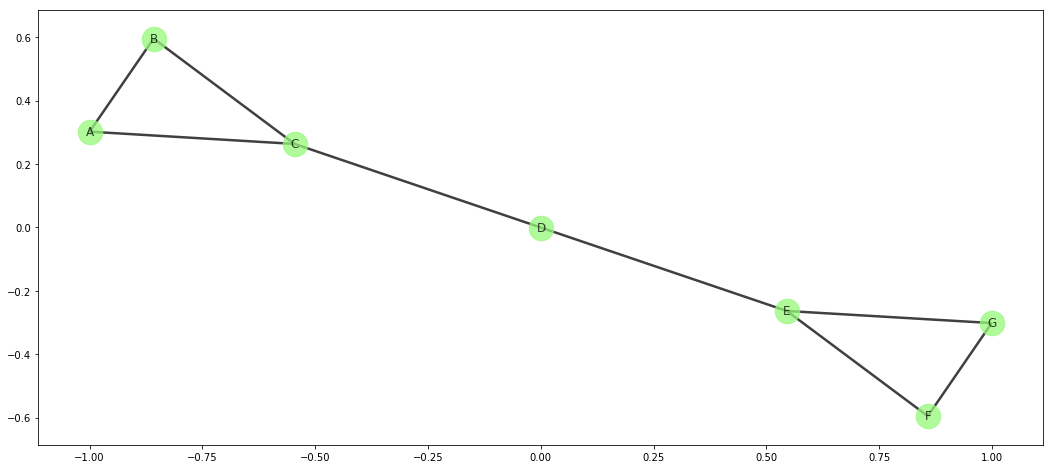

In [20]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(betweenness_graph, node_color='xkcd:light green',
                 alpha=.75, width=2.5, node_size=600)

In [21]:

betweenness_centrality = nx.betweenness_centrality(betweenness_graph, normalized=False, endpoints=False)
for node in node_list:
    print(node, betweenness_centrality[node])

A 0.0
B 0.0
C 8.0
D 9.0
E 8.0
F 0.0
G 0.0



For the same network, what is the normalized betweenness centrality (excluding endpoints) of node D?

In [22]:

nx.betweenness_centrality(betweenness_graph, normalized=True, endpoints=False)['D']

0.6

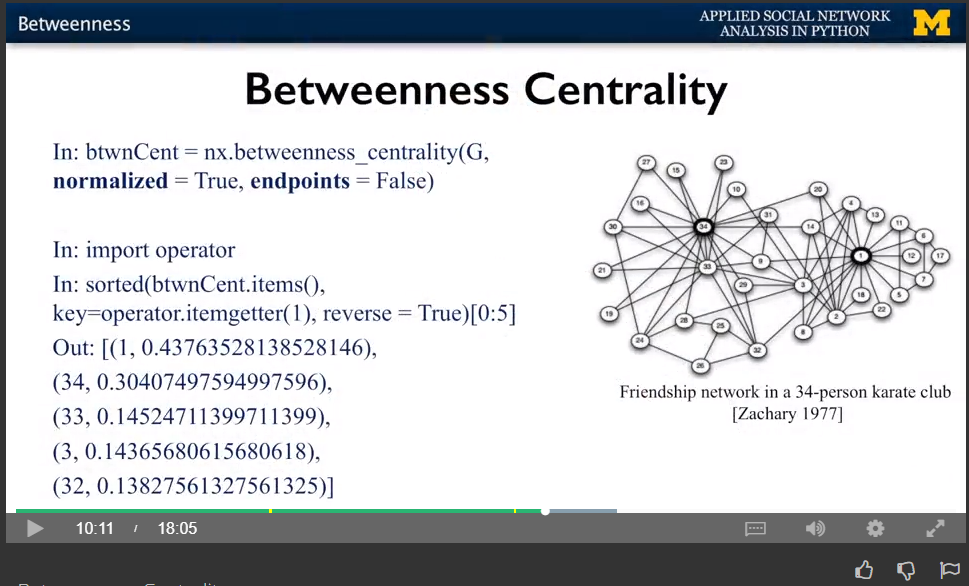

In [23]:

from IPython.display import Image

Image('../../saves/png/betweenness_centrality_karate_club.png')

In [24]:

import operator
%pprint

bc_dict = nx.betweenness_centrality(karate_club_graph, normalized=True, endpoints=False)
sorted(bc_dict.items(), key=operator.itemgetter(1), reverse=True)[0:5]

Pretty printing has been turned OFF


[(1, 0.43763528138528146), (34, 0.30407497594997596), (33, 0.145247113997114), (3, 0.14365680615680618), (32, 0.13827561327561325)]

In [25]:

import operator
%pprint

bc_approx = nx.betweenness_centrality(karate_club_graph,
                                      normalized=True, endpoints=False,
                                      k=10)
sorted(bc_approx.items(), key=operator.itemgetter(1),
       reverse=True)[0:5]

Pretty printing has been turned ON


[(1, 0.42764219576719575),
 (34, 0.35625691438191437),
 (3, 0.11455988455988456),
 (33, 0.10922949735449734),
 (32, 0.0712191859066859)]

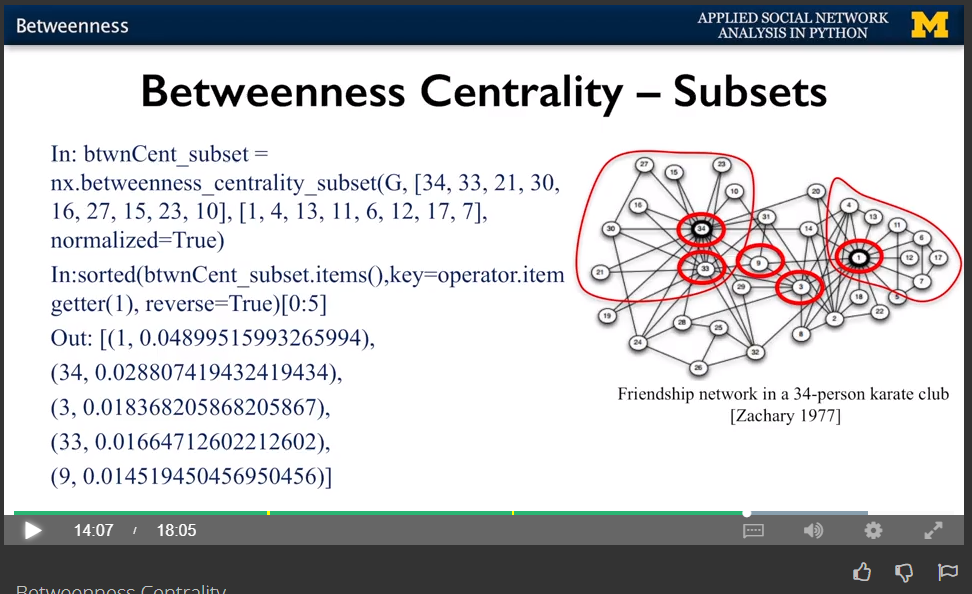

In [26]:

from IPython.display import Image

Image('../../saves/png/betweenness_centrality_subsets.png')

In [27]:

import operator
%pprint

source_list = [34, 33, 21, 30, 16, 27, 15, 23, 10]
target_list = [1, 4, 13, 11, 6, 12, 17, 7]
bcs_dict = nx.betweenness_centrality_subset(karate_club_graph, 
                                            sources=source_list, 
                                            targets=target_list, 
                                            normalized=True)
sorted(bcs_dict.items(), key=operator.itemgetter(1),
       reverse=True)[0:5]

Pretty printing has been turned OFF


[(1, 0.04899515993265994), (34, 0.028807419432419434), (3, 0.018368205868205867), (33, 0.01664712602212602), (9, 0.014519450456950456)]

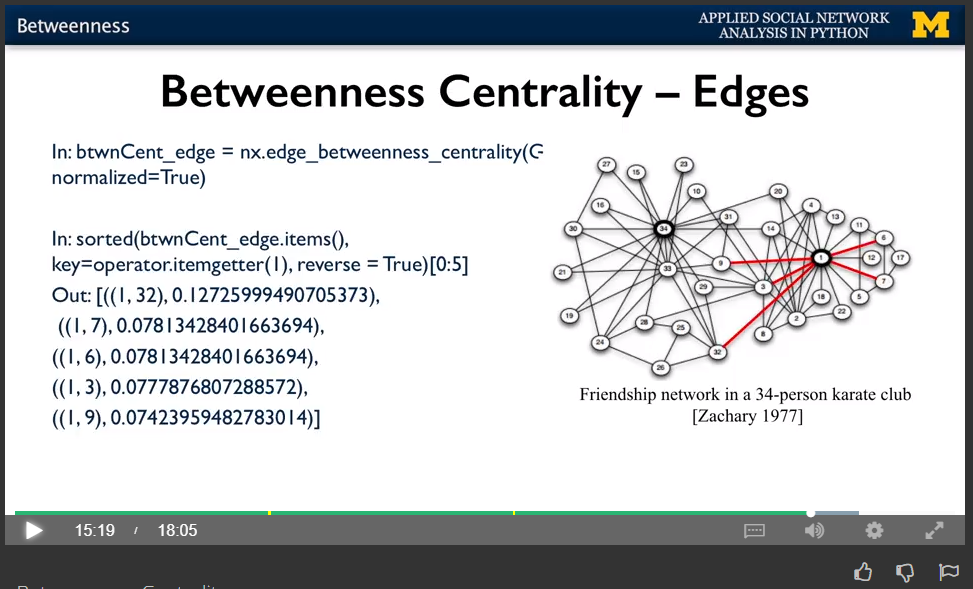

In [28]:

from IPython.display import Image

Image('../../saves/png/betweenness_centrality_edges.png')

In [29]:

# Betweenness centrality of an edge e is the sum of the
# fraction of all-pairs shortest paths that pass through e
ebc_dict = nx.edge_betweenness_centrality(karate_club_graph, normalized=True)
sorted(ebc_dict.items(), key=operator.itemgetter(1),
       reverse=True)[0:5]

[((1, 32), 0.1272599949070537), ((1, 7), 0.07813428401663695), ((1, 6), 0.07813428401663694), ((1, 3), 0.0777876807288572), ((1, 9), 0.07423959482783014)]

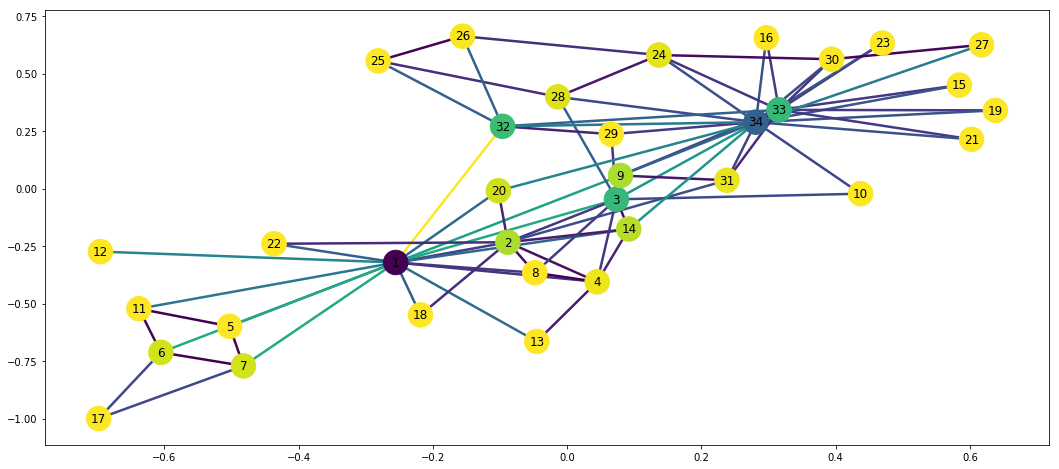

In [32]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
pos_dict = nx.spring_layout(karate_club_graph)
node_list = karate_club_graph.nodes()
bc_dict = nx.betweenness_centrality(karate_club_graph, normalized=True, endpoints=False)
node_color_list = [bc_dict[node] for node in node_list]
font_color_list = node_color_list[::-1]
label_dict = nx.draw_networkx_labels(karate_club_graph, pos=pos_dict, font_size=12,
                                     color=font_color_list)
edge_list = karate_club_graph.edges()
edge_color_list = [ebc_dict[edge] for edge in edge_list]
line_collection = nx.draw_networkx_edges(karate_club_graph, pos=pos_dict, width=2.5,
                                         edge_color=edge_color_list, cmap='viridis_r')
path_collection = nx.draw_networkx_nodes(karate_club_graph, pos=pos_dict, nodelist=node_list,
                                         node_size=600, node_color=node_color_list, cmap='viridis_r')

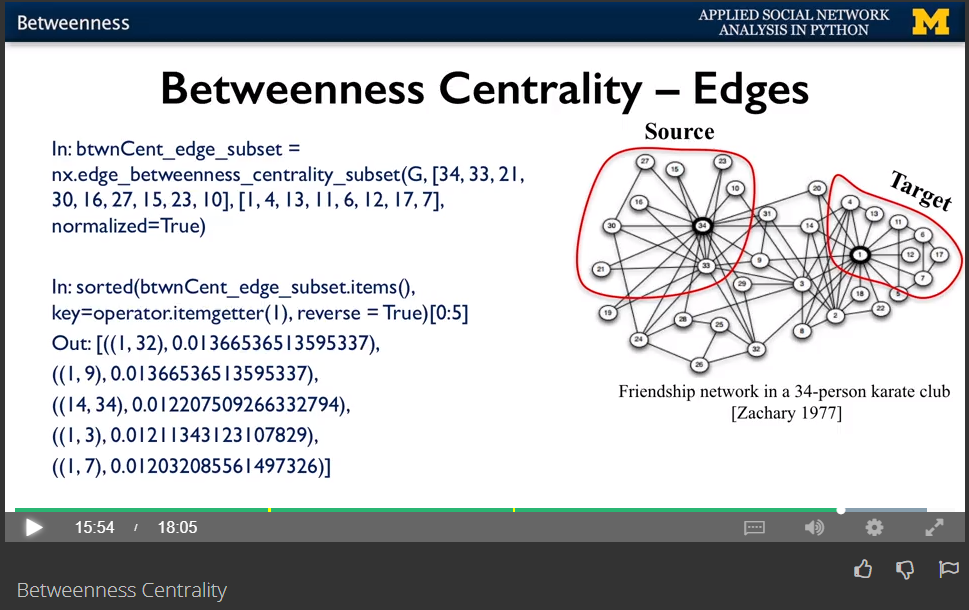

In [33]:

from IPython.display import Image

Image('../../saves/png/betweenness_centrality_edges_subsets.png')

In [34]:

import operator

source_list = [34, 33, 21, 30, 16, 27, 15, 23, 10]
target_list = [1, 4, 13, 11, 6, 12, 17, 7]
ebcs_dict = nx.edge_betweenness_centrality_subset(karate_club_graph,
                                                  sources=source_list,
                                                  targets=target_list,
                                                  normalized=True)
sorted(ebcs_dict.items(), key=operator.itemgetter(1),
       reverse=True)[0:5]

[((1, 9), 0.01366536513595337), ((1, 32), 0.01366536513595337), ((14, 34), 0.012207509266332794), ((1, 3), 0.01211343123107829), ((1, 6), 0.012032085561497326)]


# Basic Page Rank

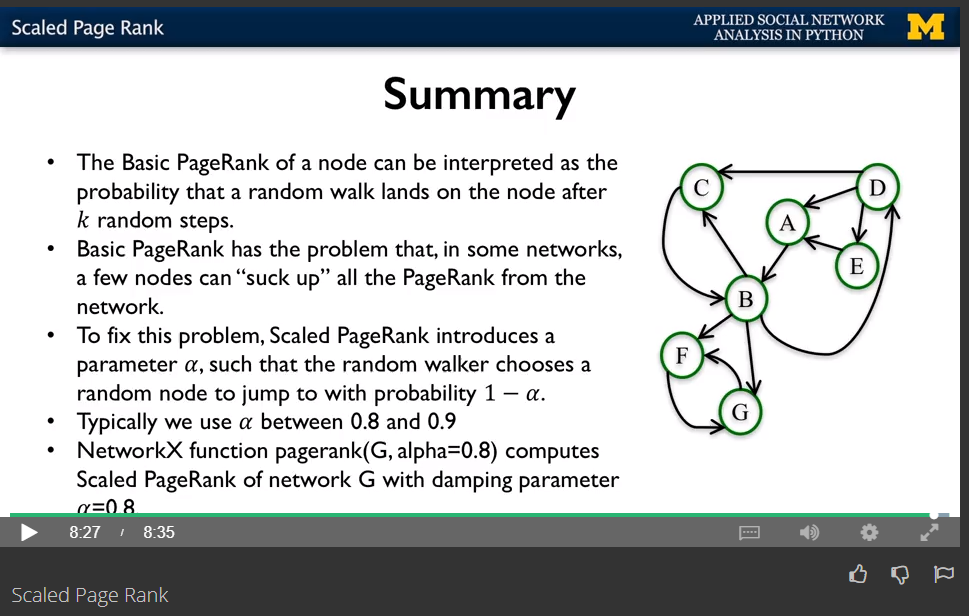

In [35]:

from IPython.display import Image

Image('../../saves/png/page_rank.png')

In [36]:

import networkx as nx

page_rank_graph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 72)]
page_rank_graph.add_nodes_from(node_list)
page_rank_graph.add_edges_from([('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'F'), ('B', 'G'), ('C', 'B'),
                                ('D', 'A'), ('D', 'C'), ('D', 'E'), ('E', 'A'), ('F', 'G'), ('G', 'F')])

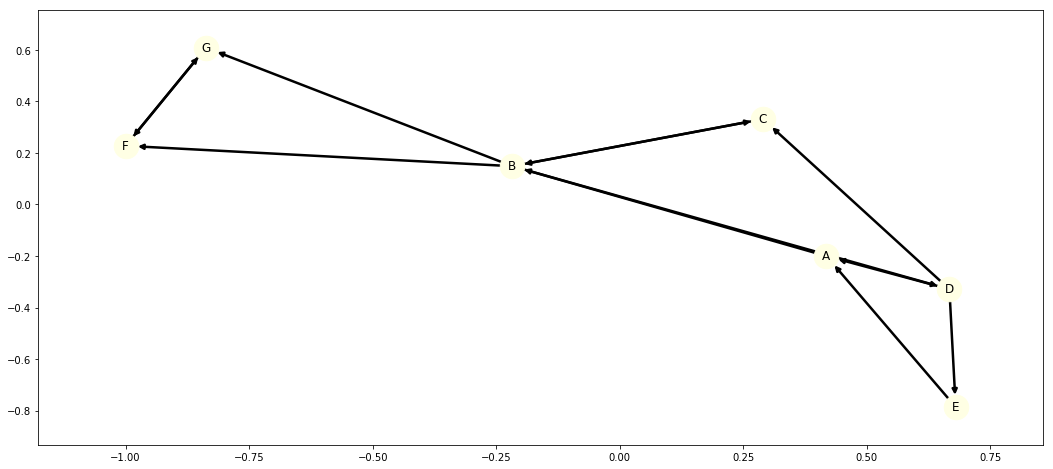

In [37]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(page_rank_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [38]:

%pprint

nx.pagerank(page_rank_graph, alpha=0.8)

Pretty printing has been turned ON


{'A': 0.0797510311959225,
 'B': 0.15216425904765085,
 'C': 0.07473913572031664,
 'D': 0.05900450477059524,
 'E': 0.044306059521149965,
 'F': 0.29501750487218237,
 'G': 0.2950175048721824}


# Hubs and Authorities

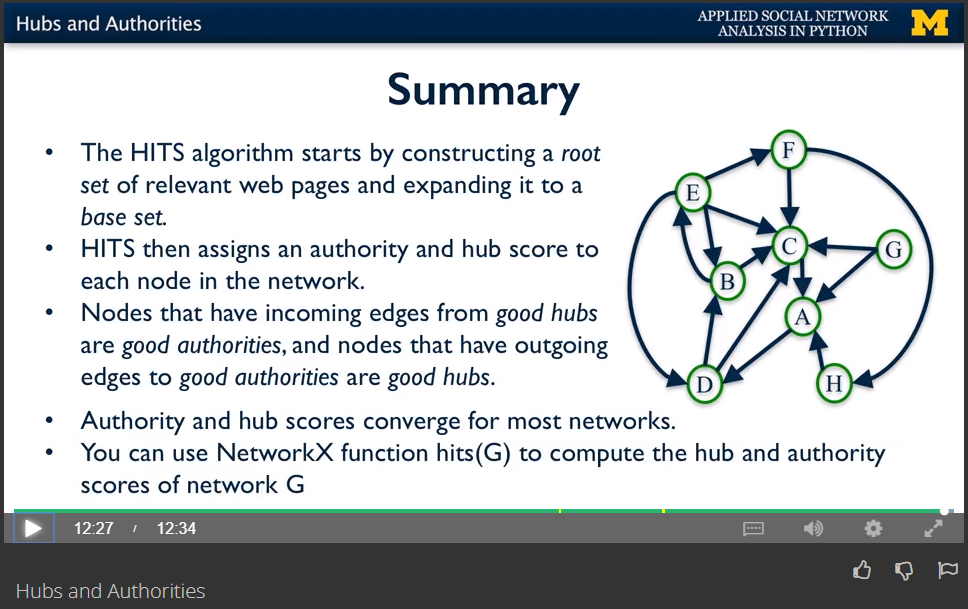

In [39]:

from IPython.display import Image

Image('../../saves/png/hits.png')

In [40]:

import networkx as nx

hits_graph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 73)]
hits_graph.add_nodes_from(node_list)
hits_graph.add_edges_from([('A', 'D'), ('B', 'C'), ('B', 'E'), ('C', 'A'), ('D', 'B'), ('D', 'C'),
                           ('E', 'B'), ('E', 'C'), ('E', 'D'), ('E', 'F'), ('F', 'C'), ('F', 'H'),
                           ('G', 'A'), ('G', 'C'), ('H', 'A')])

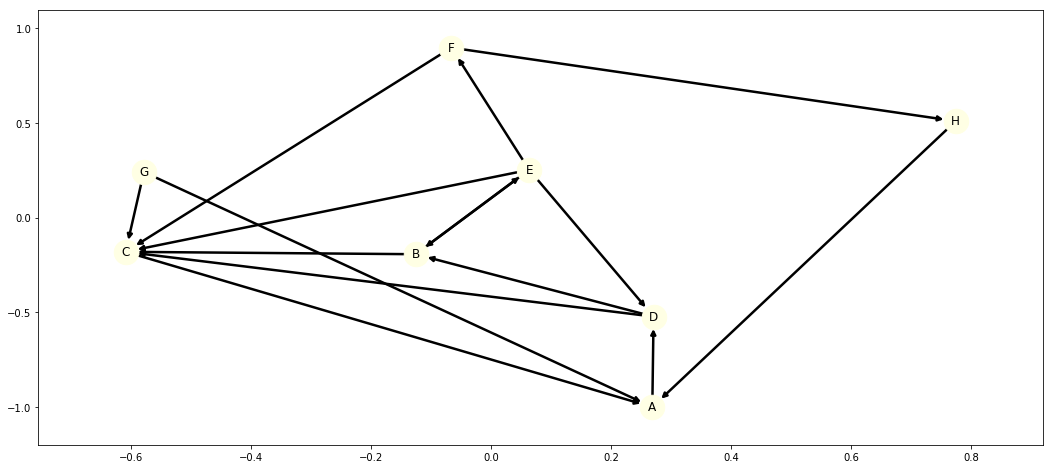

In [41]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(hits_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [42]:

%pprint

nx.hits(page_rank_graph)

Pretty printing has been turned OFF


({'A': 6.426634829924115e-15, 'B': 0.4574605834896257, 'C': 6.426634829924115e-15, 'D': 0.2538714733692072, 'E': 0.06270107637358564, 'F': 0.11298343338378435, 'G': 0.11298343338378435}, {'A': 0.1099162657339696, 'B': 1.126602193449279e-14, 'C': 0.2469796040012721, 'D': 0.15883360295804577, 'E': 0.08814600104322631, 'F': 0.19806226313173753, 'G': 0.19806226313173753})


# Comparing Centrality Examples

In [43]:

import networkx as nx

centrality_examples_graph = nx.DiGraph()
node_list = list(range(1, 10))
centrality_examples_graph.add_nodes_from(node_list)
centrality_examples_graph.add_edges_from([(1, 2), (1, 5), (2, 1), (2, 3), (2, 4),
                                          (3, 1), (3, 2), (3, 4), (4, 1), (4, 3),
                                          (5, 1), (5, 6), (6, 5), (6, 7),
                                          (7, 6), (7, 8), (7, 9), (8, 6), (8, 7), (8, 9), (8, 6),
                                          (9, 6), (9, 8)])

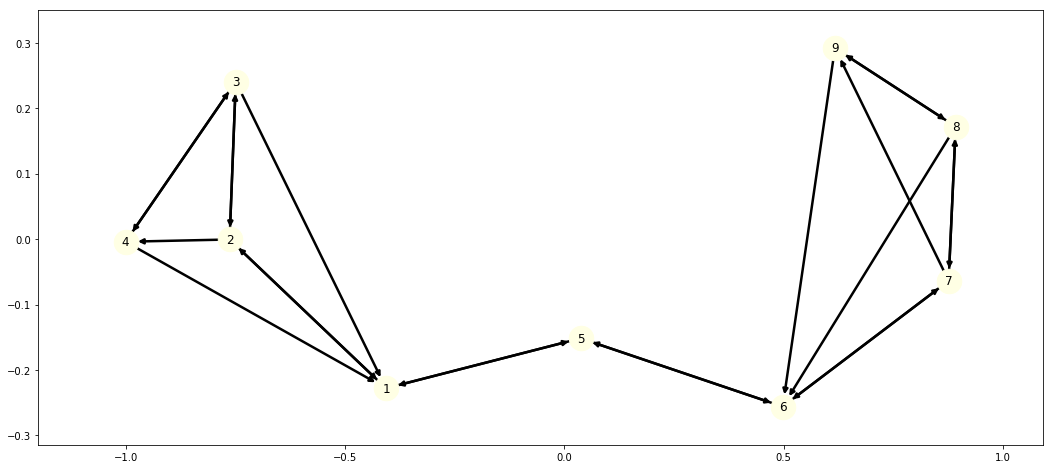

In [44]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(centrality_examples_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [45]:

import networkx as nx
import operator

in_deg = dict(centrality_examples_graph.in_degree(centrality_examples_graph.nodes()))
print('In degree:', sorted(in_deg.items(), key=operator.itemgetter(1), reverse=True))
closeness = nx.closeness_centrality(centrality_examples_graph, u=None, wf_improved=True,
                                    reverse=True)
print('Closeness centrality:', sorted(closeness.items(), key=operator.itemgetter(1),
                                      reverse=True))
betweenness = nx.betweenness_centrality(centrality_examples_graph, normalized=False,
                                        endpoints=False)
print('Betweeness centrality:', sorted(betweenness.items(), key=operator.itemgetter(1),
                                       reverse=True))
page_rank = nx.pagerank(centrality_examples_graph, alpha=0.8)
print('PageRank:', sorted(page_rank.items(), key=operator.itemgetter(1), reverse=True))
auth = nx.hits(centrality_examples_graph)[1]
print('Authority:', sorted(auth.items(), key=operator.itemgetter(1), reverse=True))
hub = nx.hits(centrality_examples_graph)[0]
print('Hub:', sorted(hub.items(), key=operator.itemgetter(1), reverse=True))

In degree: [(1, 4), (6, 4), (2, 2), (3, 2), (4, 2), (5, 2), (7, 2), (8, 2), (9, 2)]
Closeness centrality: [(5, 0.4444444444444444), (1, 0.42105263157894735), (6, 0.42105263157894735), (2, 0.36363636363636365), (3, 0.36363636363636365), (7, 0.36363636363636365), (8, 0.36363636363636365), (4, 0.34782608695652173), (9, 0.34782608695652173)]
Betweeness centrality: [(5, 32.0), (1, 30.5), (6, 30.5), (2, 12.0), (7, 12.0), (3, 0.5), (8, 0.5), (4, 0.0), (9, 0.0)]
PageRank: [(1, 0.1624924244197534), (6, 0.1624924244197534), (5, 0.15221518761879843), (2, 0.10860933649370949), (7, 0.10860933649370949), (3, 0.08021505931151808), (8, 0.08021505931151808), (4, 0.07257558596561971), (9, 0.07257558596561971)]
Authority: [(1, 0.21121135254127466), (6, 0.21121135254127466), (4, 0.1107792643943093), (9, 0.1107792643943093), (3, 0.10043208814696536), (8, 0.10043208814696536), (2, 0.06528116009772789), (7, 0.06528116009772789), (5, 0.02459226963944558)]
Hub: [(2, 0.14848705085104583), (5, 0.1484870508510458

In [46]:

import networkx as nx

one_graph = nx.Graph()
node_list = [chr(i) for i in range(65, 71)]
one_graph.add_nodes_from(node_list)
one_graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E'),
                          ('D', 'G'), ('E', 'G'), ('G', 'F')])

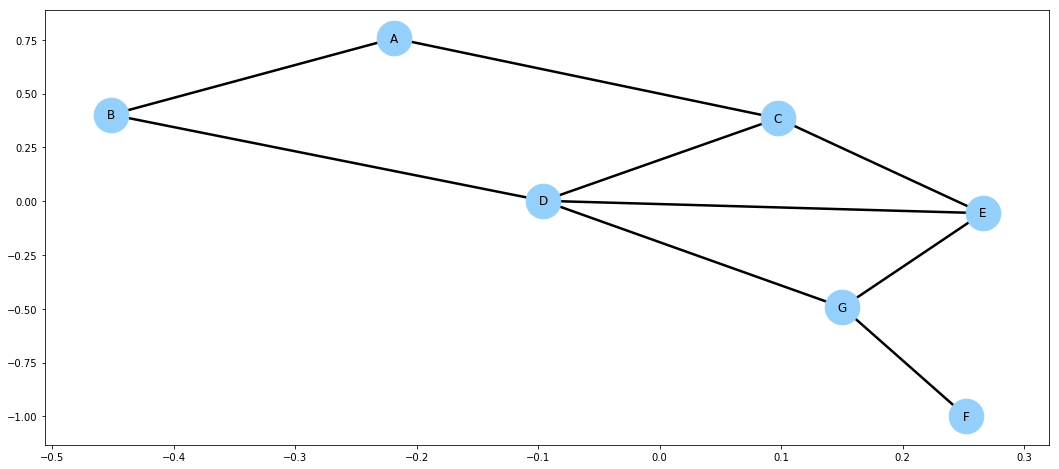

In [60]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(one_graph, node_color='xkcd:light blue',
                 width=2.5, node_size=1200)

In [48]:

nx.degree_centrality(one_graph)

{'A': 0.3333333333333333, 'B': 0.3333333333333333, 'C': 0.5, 'D': 0.6666666666666666, 'E': 0.5, 'F': 0.16666666666666666, 'G': 0.5}

In [49]:

nx.closeness_centrality(one_graph, u=None, distance=None, wf_improved=True, reverse=False)

{'A': 0.46153846153846156, 'B': 0.5454545454545454, 'C': 0.6, 'D': 0.75, 'E': 0.6666666666666666, 'F': 0.4, 'G': 0.6}

In [50]:

nx.betweenness_centrality(one_graph, k=None, normalized=True, weight=None, endpoints=False, seed=None)

{'A': 0.03333333333333333, 'B': 0.07777777777777777, 'C': 0.18888888888888888, 'D': 0.38888888888888884, 'E': 0.1111111111111111, 'F': 0.0, 'G': 0.3333333333333333}

In [51]:

ebc_dict = nx.edge_betweenness_centrality(one_graph, k=None, normalized=False, weight=None, seed=None)
sorted(ebc_dict.items(), key=operator.itemgetter(1), reverse=True)

[(('D', 'G'), 6.333333333333333), (('F', 'G'), 6.0), (('B', 'D'), 5.666666666666667), (('A', 'C'), 4.333333333333333), (('E', 'G'), 3.6666666666666665), (('C', 'D'), 3.666666666666666), (('C', 'E'), 3.666666666666666), (('A', 'B'), 2.666666666666666), (('D', 'E'), 2.0)]

In [52]:

import networkx as nx

seven_graph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 69)]
seven_graph.add_nodes_from(node_list)
seven_graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'A'), ('C', 'D'), ('D', 'C')])

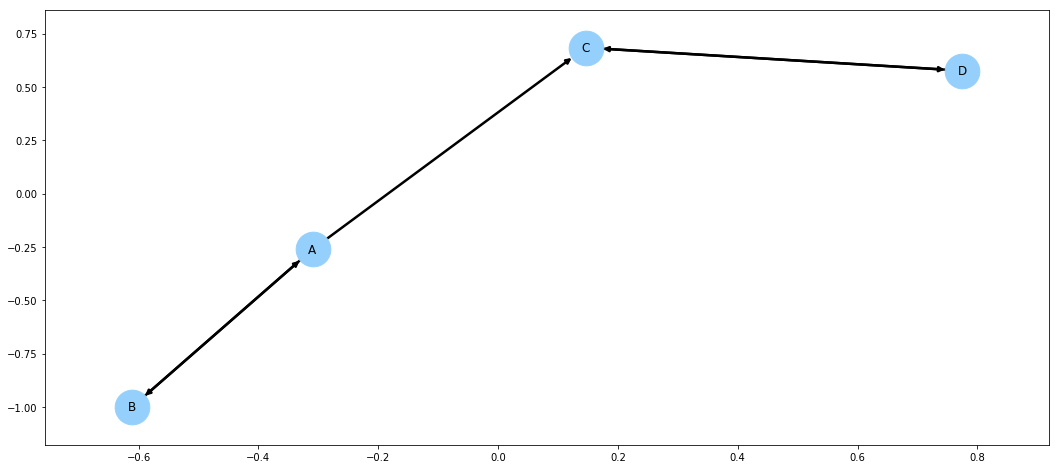

In [61]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(seven_graph, node_color='xkcd:light blue',
                 width=2.5, node_size=1200)

In [54]:

for i in [0.5, 0.95, 0.9, 0.8]:
    page_rank = nx.pagerank(seven_graph, alpha=i)
    print(str(i), str(page_rank['D']))

0.5 0.28571319580078125
0.95 0.4555778814326893
0.9 0.420166725100649
0.8 0.36764573423540375


In [64]:

choice_list = [0.95, 0.9, 0.8, 0.5]
max(zip(choice_list, [nx.pagerank(seven_graph,
                                  alpha=i)['D'] for i in choice_list]),
    key=lambda x: x[1])

(0.95, 0.4555778814326893)

In [55]:

import networkx as nx

eight_graph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 69)]
eight_graph.add_nodes_from(node_list)
eight_graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'),
                            ('C', 'A'), ('D', 'C')])

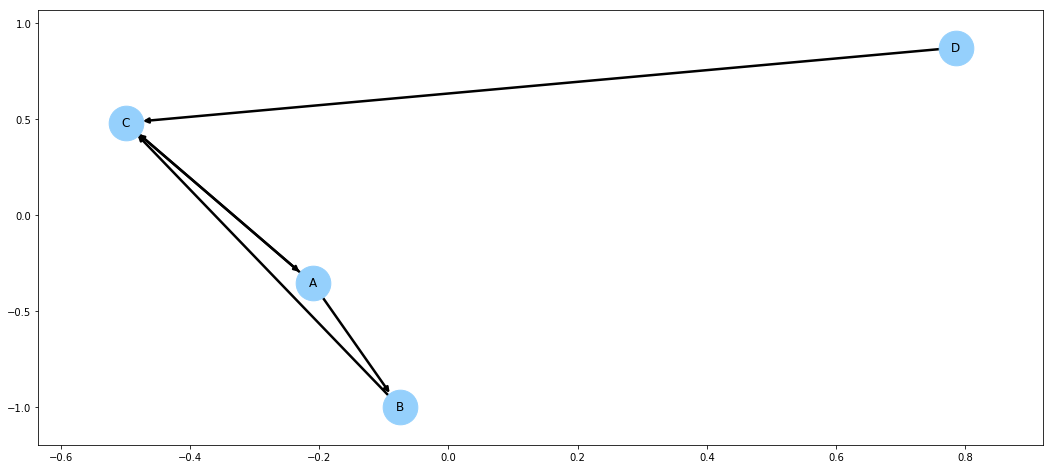

In [65]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(eight_graph, node_color='xkcd:light blue',
                 width=2.5, node_size=1200)

In [57]:

import numpy as np

page_rank = nx.pagerank(eight_graph, alpha=1.0, max_iter=1, tol=np.inf)
page_rank['C']

0.625

In [67]:

hubs_auths_tuple = nx.hits(eight_graph, max_iter=2,
                           tol=np.inf, normalized=True)
auths_dict = hubs_auths_tuple[1]
hubs_dict = hubs_auths_tuple[0]
print(auths_dict['C'], hubs_dict['C'])

0.6000000000000001 0.09090909090909091


In [69]:

for i in range(1, 5):
    print(nx.pagerank(eight_graph, alpha=1.0, max_iter=i, tol=np.inf)['D'])

0.0
0.0
0.0
0.0


In [70]:

for i in range(1, 5):
    hubs_auths_tuple = nx.hits(eight_graph, max_iter=i,
                               tol=np.inf, normalized=True)
    auths_dict = hubs_auths_tuple[1]
    hubs_dict = hubs_auths_tuple[0]
    print(auths_dict['D'], hubs_dict['D'])

0.0 0.2727272727272727
0.0 0.2727272727272727
0.0 0.2727272727272727
0.0 0.2727272727272727


In [72]:

for i in range(1, 5):
    print(sum(nx.pagerank(eight_graph, alpha=1.0,
                          max_iter=i, tol=np.inf).values()))

1.0
1.0
1.0
1.0


In [73]:

for i in range(1, 5):
    pagerank_dict = nx.pagerank(eight_graph, alpha=1.0,
                                max_iter=i, tol=np.inf)
    print(pagerank_dict['A'], pagerank_dict['C'])

0.25 0.625
0.25 0.625
0.25 0.625
0.25 0.625



In a social media network such as Twitter, where the users are nodes and following relationships are directed edges, who are likely examples of nodes that have high PageRank but low indegree-centrality and why?

In [107]:

disconnected_dipraph = nx.DiGraph()
disconnected_dipraph.add_nodes_from([chr(i) for i in range(65, 80)])
disconnected_dipraph.add_edges_from([('A', 'B'), ('A', 'E'), ('A', 'N'), ('B', 'C'), ('B', 'E'),
                                     ('C', 'A'), ('C', 'D'), ('D', 'B'), ('D', 'E'),
                                     ('E', 'C'), ('E', 'D'), ('F', 'G'), ('G', 'A'), ('G', 'J'),
                                     ('H', 'G'), ('H', 'I'), ('I', 'F'), ('I', 'G'), ('I', 'H'), ('I', 'J'),
                                     ('J', 'F'), ('J', 'O'), ('K', 'L'), ('K', 'M'), ('L', 'M'),
                                     ('N', 'L'), ('N', 'O'), ('O', 'J'), ('O', 'K'), ('O', 'L')])

In [108]:

# Draw the graph using the spring layout
pos_dict = nx.spring_layout(disconnected_dipraph)

In [109]:

# Nodes that have high PageRank
pagerank_dict = nx.pagerank(disconnected_dipraph)
sorted(page_rank_dict.items(), key=lambda x: x[1], reverse=True)

[('E', 0.12279407788337128), ('D', 0.11060435714398247), ('C', 0.10331760704546909), ('A', 0.08702583777446707), ('B', 0.0861715928964544), ('M', 0.07955847735876599), ('G', 0.0673122066572118), ('J', 0.06454583255993145), ('L', 0.06097461273800987), ('O', 0.058586304561140626), ('F', 0.04677040884884919), ('N', 0.039165637954896804), ('K', 0.03110807142421758), ('I', 0.0227270575142913), ('H', 0.019337917638941077)]

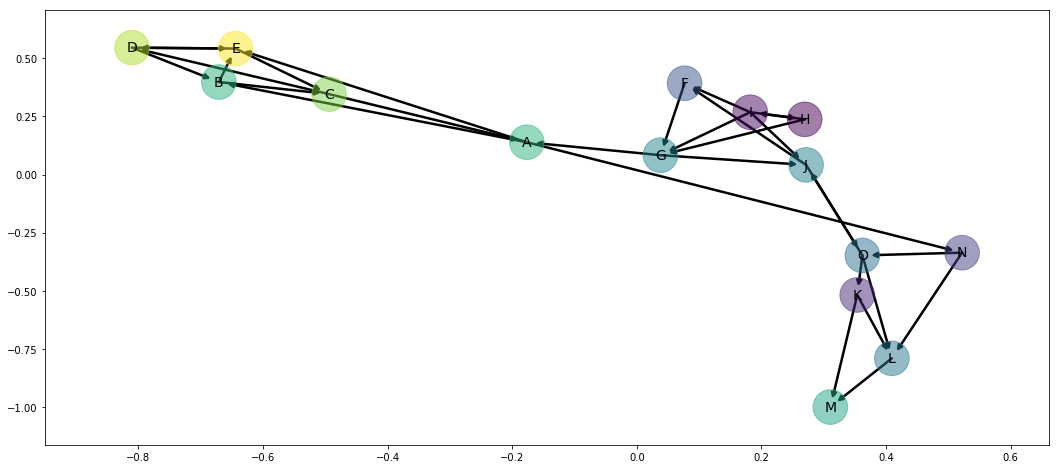

In [110]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

plt.figure(figsize=(18, 8))

label_dict = nx.draw_networkx_labels(disconnected_dipraph, pos=pos_dict, font_size=14)

line_collection = nx.draw_networkx_edges(disconnected_dipraph, pos=pos_dict, width=2.5)

# Color according to page rank
node_list = disconnected_dipraph.nodes()
node_color_list = [page_rank_dict[node] for node in node_list]
path_collection = nx.draw_networkx_nodes(disconnected_dipraph, pos=pos_dict, nodelist=node_list, alpha=0.5,
                                         node_size=1200, node_color=node_color_list, cmap='viridis')

In [111]:

# Nodes that have low indegree-centrality
in_degree_centrality_dict = nx.in_degree_centrality(disconnected_dipraph)
sorted(in_degree_centrality_dict.items(), key=lambda x: x[1], reverse=False)

[('H', 0.07142857142857142), ('I', 0.07142857142857142), ('K', 0.07142857142857142), ('N', 0.07142857142857142), ('A', 0.14285714285714285), ('B', 0.14285714285714285), ('C', 0.14285714285714285), ('D', 0.14285714285714285), ('F', 0.14285714285714285), ('M', 0.14285714285714285), ('O', 0.14285714285714285), ('E', 0.21428571428571427), ('G', 0.21428571428571427), ('J', 0.21428571428571427), ('L', 0.21428571428571427)]

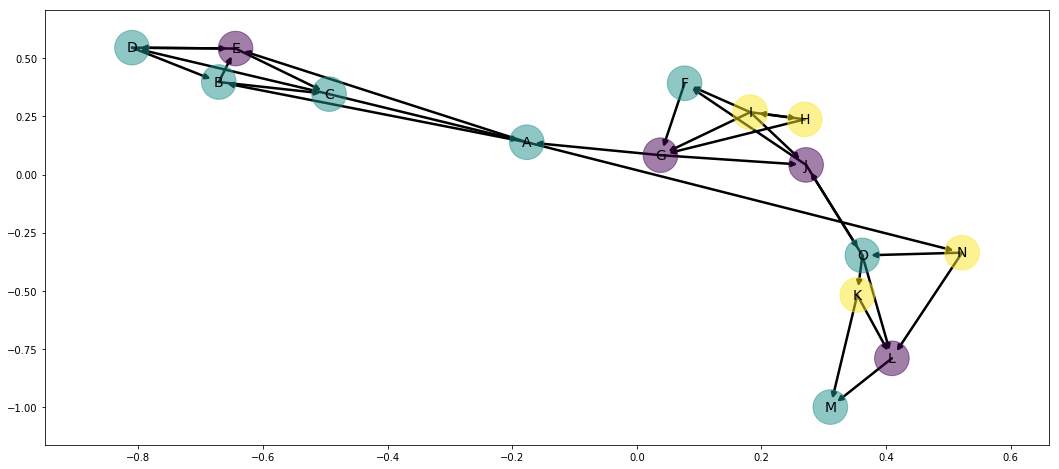

In [112]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

plt.figure(figsize=(18, 8))

label_dict = nx.draw_networkx_labels(disconnected_dipraph, pos=pos_dict, font_size=14)

line_collection = nx.draw_networkx_edges(disconnected_dipraph, pos=pos_dict, width=2.5, cmap='viridis_r')

# Color according to in degree centrality
node_list = disconnected_dipraph.nodes()
node_color_list = [in_degree_centrality_dict[node] for node in node_list]
path_collection = nx.draw_networkx_nodes(disconnected_dipraph, pos=pos_dict, nodelist=node_list, alpha=0.5,
                                         node_size=1200, node_color=node_color_list, cmap='viridis_r')


In a social media network such as Twitter, where the users are nodes and following relationships are directed edges, who are likely examples of nodes that have high PageRank but low indegree-centrality and why?

In [103]:

# Get combo dictionary
pr_idc_dict = {}
high_pr_tuple_list = page_rank_dict.items()
low_idc_tuple_list = [(idc_tuple[0], 1/idc_tuple[1]) for idc_tuple in in_degree_centrality_dict.items()]
for pr_tuple, idc_tuple in zip(high_pr_tuple_list, low_idc_tuple_list):
    node = pr_tuple[0]
    assert node == idc_tuple[0]
    pr_idc_dict[node] = pr_tuple[1] * idc_tuple[1]

In [105]:

# Nodes that have high PageRank and low indegree-centrality
sorted(pr_idc_dict.items(), key=lambda x: x[1], reverse=True)

[('D', 0.7742305000078773), ('C', 0.7232232493182836), ('A', 0.6091808644212695), ('B', 0.6032011502751808), ('E', 0.5730390301223993), ('M', 0.556909341511362), ('N', 0.5483189313685553), ('K', 0.43551299993904613), ('O', 0.4101041319279844), ('F', 0.32739286194194434), ('I', 0.3181788052000782), ('G', 0.31412363106698843), ('J', 0.3012138852796801), ('L', 0.2845481927773794), ('H', 0.2707308469451751)]

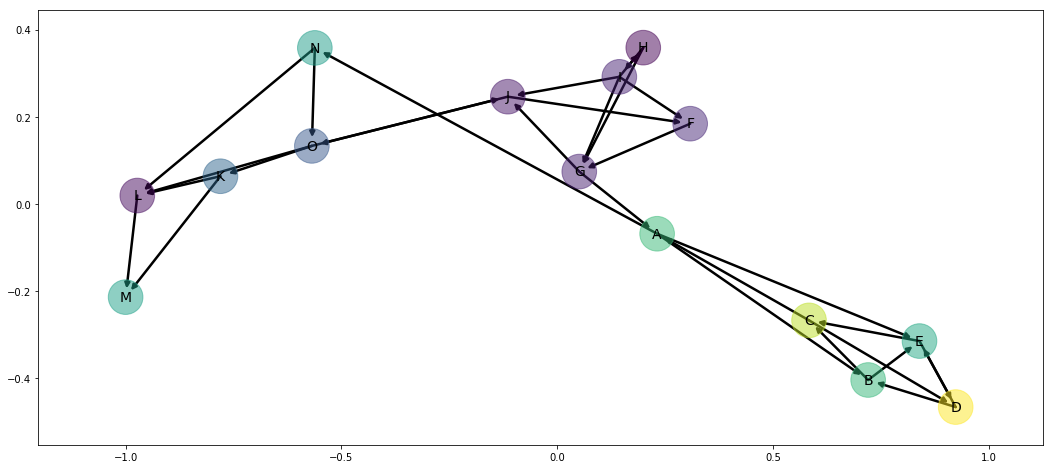

In [106]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

plt.figure(figsize=(18, 8))

label_dict = nx.draw_networkx_labels(disconnected_dipraph, pos=pos_dict, font_size=14)

line_collection = nx.draw_networkx_edges(disconnected_dipraph, pos=pos_dict, width=2.5)

# Color according to high page rank/low in-degree centrality
node_list = disconnected_dipraph.nodes()
node_color_list = [pr_idc_dict[node] for node in node_list]
path_collection = nx.draw_networkx_nodes(disconnected_dipraph, pos=pos_dict, nodelist=node_list, alpha=0.5,
                                         node_size=1200, node_color=node_color_list, cmap='viridis')

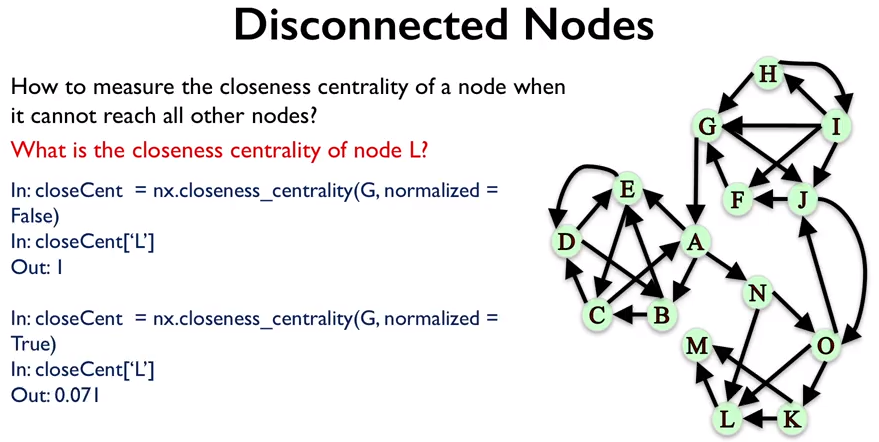

In [11]:

from IPython.display import Image

Image('../../saves/png/disconnect_nodes.png')

In [115]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

def draw_high_pr_low_idc(digraph):
    
    # Nodes that have high PageRank
    pagerank_dict = nx.pagerank(digraph)
    
    # Nodes that have low indegree-centrality
    in_degree_centrality_dict = nx.in_degree_centrality(digraph)
    
    # Nodes that have high PageRank and low indegree-centrality
    pr_idc_dict = {}
    high_pr_tuple_list = page_rank_dict.items()
    low_idc_tuple_list = [(idc_tuple[0], 1/(idc_tuple[1]+0.01)) for idc_tuple in in_degree_centrality_dict.items()]
    for pr_tuple, idc_tuple in zip(high_pr_tuple_list, low_idc_tuple_list):
        node = pr_tuple[0]
        pr_idc_dict[node] = pr_tuple[1] * idc_tuple[1]
    
    # Draw the graph using the spring layout
    pos_dict = nx.spring_layout(digraph)

    plt.figure(figsize=(18, 8))

    label_dict = nx.draw_networkx_labels(digraph, pos=pos_dict, font_size=14)

    line_collection = nx.draw_networkx_edges(digraph, pos=pos_dict, width=2.5)

    # Color according to high page rank/low in-degree centrality
    node_list = digraph.nodes()
    node_color_list = [pr_idc_dict[node] for node in node_list]
    path_collection = nx.draw_networkx_nodes(digraph, pos=pos_dict, nodelist=node_list, alpha=0.5,
                                             node_size=1200, node_color=node_color_list, cmap='viridis')

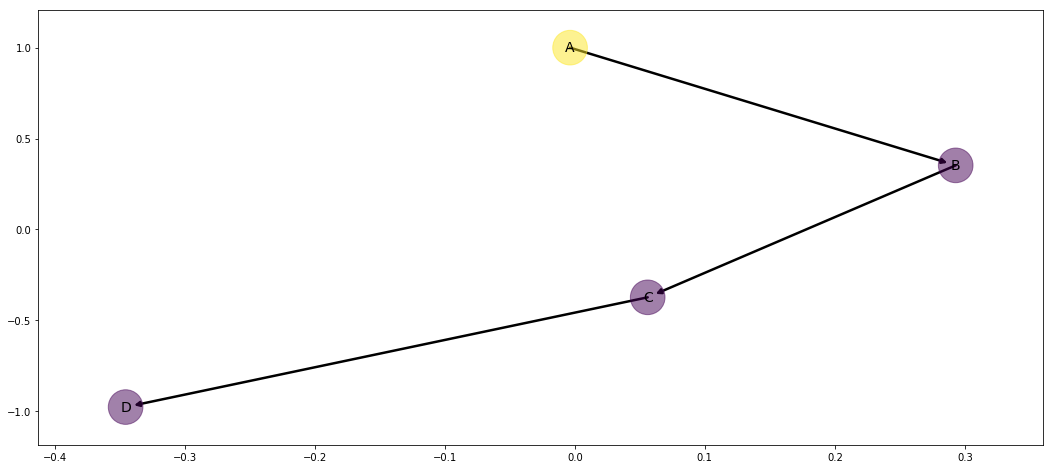

In [116]:

import numpy as np

abcd_dipraph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 69)]
abcd_dipraph.add_nodes_from(node_list)
abcd_dipraph.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D')])
draw_high_pr_low_idc(abcd_dipraph)